In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d

from legwork import evol, utils
import legwork.strain as strain
import legwork

from astropy.constants import G
from astropy.constants import c
import astropy.units as u
from astropy.visualization import quantity_support
quantity_support()

import random

from joblib import Parallel, delayed
import os


## Source load

In [ ]:

df40 = pd.read_csv("data/selected_emri_moments40.csv")
a40 = df40['a (pc)']
ecc40 = df40['e']
f_orb40 = df40['f_orb']
delta_f_orb40 = df40['delta_f_orb']
t40 = df40['time']


df40_2_1200 = pd.read_csv("data/selected_emri_moments40_2_1200.csv")
a40_2_1200 = df40_2_1200['a (pc)']
ecc40_2_1200 = df40_2_1200['e']
f_orb40_2_1200 = df40_2_1200['f_orb']
delta_f_orb40_2_1200 = df40_2_1200['delta_f_orb']
t40_2_1200 = df40_2_1200['time']

df40_25_1200 = pd.read_csv("data/selected_emri_moments40_2.5_1200.csv")
a40_25_1200 = df40_25_1200['a (pc)']
ecc40_25_1200 = df40_25_1200['e']
f_orb40_25_1200 = df40_25_1200['f_orb']
delta_f_orb40_25_1200 = df40_25_1200['delta_f_orb']
t40_25_1200 = df40_25_1200['time']

df40_3_1200 = pd.read_csv("data/selected_emri_moments40_3_1200.csv")
a40_3_1200 = df40_3_1200['a (pc)']
ecc40_3_1200 = df40_3_1200['e']
f_orb40_3_1200 = df40_3_1200['f_orb']
delta_f_orb40_3_1200 = df40_3_1200['delta_f_orb']
t40_3_1200 = df40_3_1200['time']

df40_35_1200 = pd.read_csv("data/selected_emri_moments40_3.5_1200.csv")
a40_35_1200 = df40_35_1200['a (pc)']
ecc40_35_1200 = df40_35_1200['e']
f_orb40_35_1200 = df40_35_1200['f_orb']
delta_f_orb40_35_1200 = df40_35_1200['delta_f_orb']
t40_35_1200 = df40_35_1200['time']


In [ ]:
e_band_40 =0.9981965637561944
e_thr_40 =0.35321617340397166
e_min_40 =0.2
n2_40 = 165
n1_40 =0.35


e_band_40_2_1200 =0.9972540943533722
e_thr_40_2_1200 =0.35300663550929084
e_min_40_2_1200 =0.2
n2_40_2_1200 = 132
n1_40_2_1200 =0.34


e_band_40_25_1200 =0.9972550112449451
e_thr_40_25_1200 =0.3516286420748556
e_min_40_25_1200 =0.2
n2_40_25_1200 = 127
n1_40_25_1200 =0.29


e_band_40_3_1200 =0.9972541741591334
e_thr_40_3_1200 =0.3522894575977534
e_min_40_3_1200 =0.2
n2_40_3_1200 =87
n1_40_3_1200 =0.1


e_band_40_35_1200 =0.9972525404226541
e_thr_40_35_1200 =0.35289345586459336
e_min_40_35_1200 =0.2
n2_40_35_1200 =15
n1_40_35_1200 =0.0098

In [ ]:
sources40 = [
    {'ecc': e, 'f_orb': f_orb, 'delta_f_orb': delta_f_orb, 'time': t}
    for e, f_orb, delta_f_orb, t in zip(ecc40, f_orb40, delta_f_orb40,t40)
]
sources40_2_1200 = [
    {'ecc': e, 'f_orb': f_orb, 'delta_f_orb': delta_f_orb, 'time': t}
    for e, f_orb, delta_f_orb, t in zip(ecc40_2_1200, f_orb40_2_1200, delta_f_orb40_2_1200,t40_2_1200)
]
sources40_25_1200 = [
    {'ecc': e, 'f_orb': f_orb, 'delta_f_orb': delta_f_orb, 'time': t}
    for e, f_orb, delta_f_orb, t in zip(ecc40_25_1200, f_orb40_25_1200, delta_f_orb40_25_1200,t40_25_1200)
]
sources40_3_1200 = [
    {'ecc': e, 'f_orb': f_orb, 'delta_f_orb': delta_f_orb, 'time': t}
    for e, f_orb, delta_f_orb, t in zip(ecc40_3_1200, f_orb40_3_1200, delta_f_orb40_3_1200,t40_3_1200)
]
sources40_35_1200 = [
    {'ecc': e, 'f_orb': f_orb, 'delta_f_orb': delta_f_orb, 'time': t}
    for e, f_orb, delta_f_orb, t in zip(ecc40_35_1200, f_orb40_35_1200, delta_f_orb40_35_1200,t40_35_1200)
]

## Parameters

In [22]:

m_1 = 40* u.Msun
m_2 =  4.3*10**6 * u.Msun
mu = m_1 * m_2 / (m_1 + m_2)
M = m_1 + m_2
m_c = utils.chirp_mass(m_1, m_2)

ecc_i = 0.9995
a_i = 0.01 * u.pc
f_orb_i = utils.get_f_orb_from_a(a =a_i, m_1=m_1, m_2=m_2)

dist = 8 * u.kpc
t_obs = 1 * u.yr

# calculate other params
beta = utils.beta(m_1=m_1, m_2=m_2)
c_0 = utils.c_0(a_i, ecc_i)

t_merge = evol.get_t_merge_ecc(ecc_i, a_i=a_i, f_orb_i=f_orb_i, beta=beta, m_1=m_1, m_2=m_2, small_e_tol=0.05, large_e_tol=0.9999, exact=True)
t_merge = t_merge.to(u.yr)

evol.check_mass_freq_input(beta=beta, m_1=m_1, m_2=m_2, a_i=a_i, f_orb_i=f_orb_i)
delta_f = 1e-5 * u.Hz               
f_min = 1e-5 * u.Hz                 
f_max = 1e-1 * u.Hz                 

bin_frequencies = np.arange(f_min.to_value(u.Hz), f_max.to_value(u.Hz), delta_f.to_value(u.Hz)) * u.Hz



## Characteristic strain

In [11]:
def calculate_h2_c_gwb_multiple_bins(h_m_n,h_c_m_n, f_m_n, T_obs, delta_f_mn, delta_f, bin_frequencies,f_m_n_dot):
    bin_contributions = {}

    factor = f_m_n / (f_m_n_dot * T_obs)

    if factor < 1:
        h2_c_gwb = (h_c_m_n**2 / (2 * f_m_n * T_obs)).to_value(u.dimensionless_unscaled)  # 转换为无单位
                   
    else:
        
        h2_c_gwb = ((h_m_n**2) / (2)) 

    if delta_f_mn > delta_f:

        f_min = f_m_n
        f_max = f_m_n + delta_f_mn

        
        for bin_freq in bin_frequencies:
            if f_min <= bin_freq <= f_max:  
                bin_contributions[bin_freq] = h2_c_gwb  
                
    else:

        closest_bin = min(bin_frequencies, key=lambda x: abs(x - f_m_n))
        bin_contributions[closest_bin] = h2_c_gwb

    return bin_contributions


def compute_h_gwb_bins(sourcess1, T_obs, delta_f, f_min, f_max, bin_frequencies):
    
    h_gwb_bins = np.zeros(len(bin_frequencies))

    f_orb_m = sourcess1['f_orb'] * u.Hz  
    delta_f_orb_m = sourcess1['delta_f_orb'] * u.Hz  
    ecc_m = sourcess1['ecc']
 
    n = 1
    while n < 1000:
        f_m_n = n * f_orb_m 
        if f_m_n > f_max:  
            break
        if f_m_n < f_min:
            n += 1  
            continue
            
        h_c_m_n = strain.h_c_n(m_c=m_c, f_orb=f_orb_m, ecc=ecc_m, n=n, dist=dist).flatten()
        h_m_n = strain.h_0_n(m_c=m_c, f_orb=f_orb_m, ecc=ecc_m, n=n, dist=dist).flatten()
        f_m_n_dot = legwork.utils.fn_dot(m_c, f_orb_m, ecc_m, n)

            
        delta_f_mn = n * delta_f_orb_m

            
        bin_contributions = calculate_h2_c_gwb_multiple_bins(
            h_m_n, h_c_m_n, f_m_n, T_obs, delta_f_mn, delta_f, bin_frequencies,f_m_n_dot
        )

            
        for bin_freq, contribution in bin_contributions.items():
                
            bin_index = np.where(bin_frequencies == bin_freq)[0][0]
            h_gwb_bins[bin_index] += contribution

        n += 1  
    print(n)

    return h_gwb_bins

In [ ]:
def convert_to_integer(decimal):
    
    if decimal == 0:
        return 0, 1  

    factor = 1
    while not decimal.is_integer():
        decimal *= 10
        factor *= 10

    return int(decimal), factor

In [34]:
def hgw(e_band, e_thr, e_min, n2, n1,sources11):

    sources_tt = [source['time'] for source in sources11 if  e_thr <= source['ecc'] < e_band]
    t_b = np.max(sources_tt) - np.min(sources_tt)

    n2,k2 = convert_to_integer(n2)
    n1,k1 = convert_to_integer(n1)

    print(k1,k2)

    selection_conditions = [
    {'ecc_min': e_thr, 'ecc_max':0.5},
    {'ecc_min': 0.5, 'ecc_max': 0.8},
    {'ecc_min': 0.8, 'ecc_max': 0.9},
    {'ecc_min': 0.9, 'ecc_max': 0.99},
    {'ecc_min': 0.99, 'ecc_max': e_band}
    ]

    selected_sources = []

    for condition in selection_conditions:
        ecc_min = condition['ecc_min']
        ecc_max = condition['ecc_max']
    
  
        filtered_sources = [source for source in sources11 if ecc_min <= source['ecc'] < ecc_max]
        sources_t = [source['time'] for source in filtered_sources]
    
        if len(filtered_sources) > 1:
        
            t_interval = np.max(sources_t) - np.min(sources_t)
            sample_size = int(np.round(n2  * t_interval / t_b))
        
            print(n2  *t_interval/t_b)
            print("数量:", len(filtered_sources))
            print(sample_size)

        
            if sample_size > len(filtered_sources):
                num_new_points = sample_size - len(filtered_sources)
            
           
                time_values = np.array(sources_t)
                ecc_values = np.array([source['ecc'] for source in filtered_sources])
                f_orb_values = np.array([source['f_orb'] for source in filtered_sources])
                delta_f_orb_values = np.array([source['delta_f_orb'] for source in filtered_sources])
            
            
                ecc_interp = interp1d(time_values, ecc_values, kind='linear', fill_value="extrapolate")
                f_orb_interp = interp1d(time_values, f_orb_values, kind='linear', fill_value="extrapolate")
                delta_f_orb_interp = interp1d(time_values, delta_f_orb_values, kind='linear', fill_value="extrapolate")
            
            
                new_times = np.linspace(np.min(sources_t), np.max(sources_t), sample_size)
            
            
                new_eccs = ecc_interp(new_times)
                new_f_orbs = f_orb_interp(new_times)
                new_delta_f_orbs = delta_f_orb_interp(new_times)
            
            
                for t, ecc, f_orb, delta_f_orb in zip(new_times, new_eccs, new_f_orbs, new_delta_f_orbs):
                    filtered_sources.append({'time': t, 'ecc': ecc, 'f_orb': f_orb, 'delta_f_orb': delta_f_orb})
        
    
        selected_sources.extend(random.sample(filtered_sources, sample_size))

    print("筛选出的源数量:", len(selected_sources))
    print("选中的源:", selected_sources)




    selected_sources_ = []
    required = int(n1)
    filtered_sources = [source for source in sources11 if e_min <= source['ecc'] < e_thr]
    available = len(filtered_sources)

    if available == 0:
        raise ValueError("指定偏心率范围内没有符合条件的源")

    # 根据可用源数量动态选择抽样方式
    if available >= required:
        # 数量充足：无放回随机抽样
        selected_sources1 = random.sample(filtered_sources, required)
    else:
        # 数量不足：有放回随机抽样（允许重复）
        selected_sources1 = random.choices(filtered_sources, k=required)

    selected_sources_.extend(selected_sources1)

    print(f"最终选中的源数量: {len(selected_sources_)}")
    print(f"选中的源示例: {selected_sources_[:3]}")


    result = Parallel(n_jobs=-1)(
    delayed(compute_h_gwb_bins)(sources, t_obs, delta_f, f_min, f_max, bin_frequencies)
    for sources in selected_sources
    )

    result_ = Parallel(n_jobs=-1)(
    delayed(compute_h_gwb_bins)(sources, t_obs, delta_f, f_min, f_max, bin_frequencies)
    for sources in selected_sources_
    )

    h_gwb_bins_total0 = np.sum(result, axis=0)
    h_gwb_bins_total_ = np.sum(result_, axis=0)
    h_gwb_bins_total = h_gwb_bins_total_/k1 + h_gwb_bins_total0/k2

    return h_gwb_bins_total
    

## Strain calculation

In [ ]:
h1 = []
for i in range(0,20):
    b_i = hgw(e_band_40_2_1200, e_thr_40_2_1200, e_min_40_2_1200, n2_40_2_1200, n1_40_2_1200,sources40_2_1200)
    h1.append(b_i)
    print(b_i)

a1 = np.sum(h1,axis=0)/20

hc40_2_1200 = pd.DataFrame({
        'hc':(a1)**(1/2),

        'f':bin_frequencies
})

hc40_2_1200.to_csv('data/hcgwb40_2_1200.csv',index=False)

0.5629264711350245
数量: 55
1
4.725802473726131
数量: 69
5
6.7412182345799225
数量: 26
7
52.81779235340974
数量: 77
53
65.62332437270838
数量: 15
66
筛选出的源数量: 132
选中的源: [{'ecc': 0.3902411310070124, 'f_orb': 4.519131793045373e-05, 'delta_f_orb': 3.7827558528065854e-08, 'time': 449775.9960536551}, {'ecc': 0.668813995847009, 'f_orb': 1.3462090112927932e-05, 'delta_f_orb': 3.3000045881543183e-09, 'time': 446725.9960536551}, {'ecc': 0.72621924943525, 'f_orb': 9.699439945558772e-06, 'delta_f_orb': 1.9081355467329863e-09, 'time': 445225.9960536551}, {'ecc': 0.7717977784758846, 'f_orb': 7.156009419720796e-06, 'delta_f_orb': 1.1727710398144623e-09, 'time': 443525.9960536551}, {'ecc': 0.7354543967307126, 'f_orb': 9.153362314151747e-06, 'delta_f_orb': 1.7367902325158015e-09, 'time': 444925.9960536551}, {'ecc': 0.5872941351248685, 'f_orb': 2.0036963601358143e-05, 'delta_f_orb': 6.725758699563584e-09, 'time': 448125.9960536551}, {'ecc': 0.8256082195820437, 'f_orb': 4.623602039857799e-06, 'delta_f_orb': 6.0293

In [ ]:
h2 = []
for i in range(0,20):
    b_i = hgw(e_band_40_25_1200, e_thr_40_25_1200, e_min_40_25_1200, n2_40_25_1200, n1_40_25_1200, sources40_25_1200)
    h2.append(b_i)
    print(b_i)

a2 = np.sum(h2,axis=0)/20

hc40_25_1200 = pd.DataFrame({
        'hc':(a2)**(1/2),

        'f':bin_frequencies
})

hc40_25_1200.to_csv('data/hcgwb40_2.5_1200.csv',index=False)

0.4896557108115517
数量: 60
0
4.4645079515170885
数量: 63
4
6.120696385144396
数量: 32
6
52.5659807194754
数量: 74
53
61.77497899219067
数量: 18
62
筛选出的源数量: 125
选中的源: [{'ecc': 0.7910351306243764, 'f_orb': 6.376653371872922e-06, 'delta_f_orb': 1.06936723866702e-09, 'time': 429788.8201591024}, {'ecc': 0.6542709248299121, 'f_orb': 1.508557202003085e-05, 'delta_f_orb': 4.4109434446972776e-09, 'time': 433788.8201591024}, {'ecc': 0.6598101127944255, 'f_orb': 1.4655675553947868e-05, 'delta_f_orb': 4.19200366807839e-09, 'time': 433688.8201591024}, {'ecc': 0.7951989171589127, 'f_orb': 6.168296088427182e-06, 'delta_f_orb': 1.0151536754468216e-09, 'time': 429588.8201591024}, {'ecc': 0.8370564405341947, 'f_orb': 4.252901270781175e-06, 'delta_f_orb': 5.762266178160815e-10, 'time': 427088.8201591024}, {'ecc': 0.8190376824109603, 'f_orb': 5.0388714778956526e-06, 'delta_f_orb': 7.43433187642525e-10, 'time': 428288.8201591024}, {'ecc': 0.8384169005427322, 'f_orb': 4.195866157163307e-06, 'delta_f_orb': 5.64645999

In [ ]:
h3 = []
for i in range(0,2):
    b_i = hgw(e_band_40_3_1200, e_thr_40_3_1200, e_min_40_3_1200, n2_40_3_1200, n1_40_3_1200,sources40_3_1200)
    h3.append(b_i)
    print(b_i)

a3 = np.sum(h3,axis=0)/2

hc40_3_1200 = pd.DataFrame({
        'hc':(a3)**(1/2),

        'f':bin_frequencies
})

hc40_3_1200.to_csv('data/hcgwb40_3_1200.csv',index=False)

0.2367317468120637
数量: 33
0
2.374715335208514
数量: 79
2
4.068826898332345
数量: 56
4
36.69342075586987
数量: 56
37
42.73116334614409
数量: 43
43
筛选出的源数量: 86
选中的源: [{'ecc': 0.7655286222846547, 'f_orb': 8.863420280789918e-06, 'delta_f_orb': 3.2138741087492476e-09, 'time': 304861.4639984116}, {'ecc': 0.5752579929007802, 'f_orb': 2.791208675576254e-05, 'delta_f_orb': 2.6231250576575673e-08, 'time': 306961.4639984116}, {'ecc': 0.850138401022339, 'f_orb': 4.063308882349746e-06, 'delta_f_orb': 9.011990044978207e-10, 'time': 302061.4639984116}, {'ecc': 0.8912406197424021, 'f_orb': 2.3824384202034004e-06, 'delta_f_orb': 3.9553757182795934e-10, 'time': 299261.4639984116}, {'ecc': 0.8140084723772562, 'f_orb': 5.884528190412005e-06, 'delta_f_orb': 1.629483827842171e-09, 'time': 303561.4639984116}, {'ecc': 0.8691817620049522, 'f_orb': 3.233298032094869e-06, 'delta_f_orb': 6.30947985272715e-10, 'time': 300961.4639984116}, {'ecc': 0.9709662253556472, 'f_orb': 3.005840530748212e-07, 'delta_f_orb': 2.06696632

In [ ]:
h4 = []
for i in range(0,20):
    b_i = hgw(e_band_40_35_1200, e_thr_40_35_1200, e_min_40_35_1200, n2_40_35_1200, n1_40_35_1200,sources40_35_1200)
    h4.append(b_i)
    print(b_i)

a4 = np.sum(h4,axis=0)/20

hc40_35_1200 = pd.DataFrame({
        'hc':(a4)**(1/2),

        'f':bin_frequencies
})

hc40_35_1200.to_csv('data/hcgwb40_3.5_1200.csv',index=False)

10000 1
0.03205315993688884
数量: 47
0
0.3860315348920961
数量: 87
0
0.6062228075020282
数量: 43
1
5.853185727605789
数量: 85
6
7.664886071864724
数量: 12
8
筛选出的源数量: 15
选中的源: [{'ecc': 0.8744062364366676, 'f_orb': 3.14260265449398e-06, 'delta_f_orb': 3.549107832142523e-09, 'time': 53345.73874771091}, {'ecc': 0.9730412938391508, 'f_orb': 2.787946996960218e-07, 'delta_f_orb': 1.1091836932453696e-10, 'time': 49445.73874771091}, {'ecc': 0.9642627936281692, 'f_orb': 4.2880162197809645e-07, 'delta_f_orb': 2.0052288139167684e-10, 'time': 50445.73874771091}, {'ecc': 0.9892120509329948, 'f_orb': 6.989122244722438e-08, 'delta_f_orb': 1.704788624196128e-11, 'time': 44945.73874771091}, {'ecc': 0.9750342008393036, 'f_orb': 2.48066358196862e-07, 'delta_f_orb': 9.454965172730008e-11, 'time': 49145.73874771091}, {'ecc': 0.9691285083744362, 'f_orb': 3.427685093000881e-07, 'delta_f_orb': 1.4725340645643516e-10, 'time': 49945.73874771091}, {'ecc': 0.987444120913312, 'f_orb': 8.780709487191816e-08, 'delta_f_orb': 2.

C:\Users\fengchen\AppData\Local\Temp\ipykernel_17328\1257795716.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


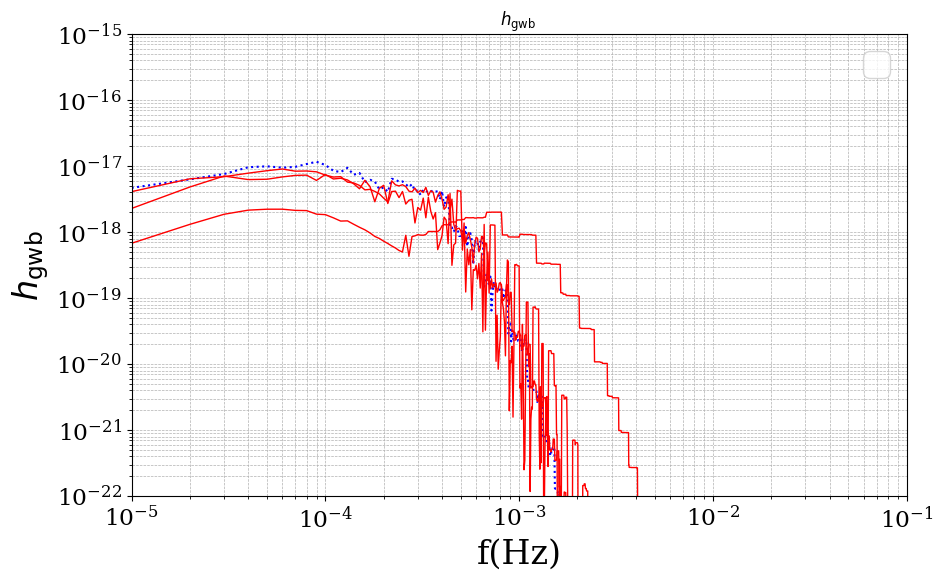

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(bin_frequencies, (a1)**(1/2), color='b',linestyle=':')
plt.plot(bin_frequencies, (a2)**(1/2), color='r',linewidth=1 )
plt.plot(bin_frequencies, (a3)**(1/2), color='r',linewidth=1 )
plt.plot(bin_frequencies, (a4)**(1/2), color='r',linewidth=1 )
plt.ylim(10**(-22), 10**(-15))
plt.xlim(10**(-5), 10**(-1))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f(Hz)')
plt.ylabel(r'$h_{\text{gwb}}$')
plt.title(r'$h_{\text{gwb}}$ ')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()